# 다변량분석 1강

In [ ]:
import pandas as pd
import numpy as np

In [30]:
# p.22
auto = pd.read_fwf("auto.dat", header = None, widths = [19,4,6,3,2,2,4,5,3,5,4,3,4,4], 
                   na_values='.')
auto.columns = ['model','origin', 'price', 'mpg', 'rep78', 'rep77', 'hroom', 'rseat', 
                'trunk', 'weight', 'length', 'turn', 'displa', 'gratio']
auto

,model,origin,price,mpg,rep78,rep77,hroom,rseat,trunk,weight,length,turn,displa,gratio
0,AMC CONCORD,A,4099,22,3.0,2.0,2.5,27.5,11,2930,186,40,121,3.58
1,AMC PACER,A,4749,17,3.0,1.0,3.0,25.5,11,3350,173,40,258,2.53
2,AMC SPIRIT,A,3799,22,NaN,NaN,3.0,18.5,12,2640,168,35,121,3.08
3,AUDI 5000,E,9690,17,5.0,2.0,3.0,27.0,15,2830,189,37,131,3.20
4,AUDI FOX,E,6295,23,3.0,3.0,2.5,28.0,11,2070,174,36,97,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW RABBIT,E,4697,25,4.0,3.0,3.0,25.5,15,1930,155,35,89,3.78
70,VW RABBIT DIESEL,E,5397,41,5.0,4.0,3.0,25.5,15,2040,155,35,90,3.78
71,VW SCIROCCO,E,6850,25,4.0,3.0,2.0,23.5,16,1990,156,36,97,3.78
72,VW DASHER,E,7140,23,4.0,3.0,2.5,37.5,12,2160,172,36,97,3.74


In [61]:
auto[['price', 'mpg', 'length']].mean()

price     6192.283784
mpg         21.297297
length     188.067568
dtype: float64

In [ ]:
auto[['price', 'mpg', 'length']].mean()
auto[['price', 'mpg', 'length']].std()

In [ ]:
auto[['price', 'mpg', 'length']].mean()
auto[['price', 'mpg', 'length']].std()
np.std(auto[['price', 'mpg', 'length']])

In [ ]:
auto[['price', 'mpg', 'length']].sum()

In [ ]:
auto[['price', 'mpg', 'length']].cov()

In [ ]:
auto[['price', 'mpg', 'length']].corr()

In [32]:
# p.29
score = pd.DataFrame({'id':range(1,13), 'type':[np.nan]*12, 
                      'total':[135,125,223,224,133,253,192,186,64,159,133,163]})

In [33]:
score.iloc[0:6,1]='rural'
score.iloc[6:,1]='urban'
score

,id,type,total
0,1,rural,135
1,2,rural,125
2,3,rural,223
3,4,rural,224
4,5,rural,133
5,6,rural,253
6,7,urban,192
7,8,urban,186
8,9,urban,64
9,10,urban,159


In [34]:
score.groupby('type')['total'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
rural,6.0,182.166667,57.174878,125.0,133.5,179.0,223.75,253.0
urban,6.0,149.500000,46.890298,64.0,139.5,161.0,180.25,192.0


In [35]:
# p.30 - standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
f = lambda x: (scaler.fit_transform(x.to_frame()))[:,0]

In [36]:
score_std = score.copy()
score_std['total'] = score.groupby('type')['total'].transform(f)
score_std

,id,type,total
0,1,rural,-0.903692
1,2,rural,-1.095288
2,3,rural,0.782348
3,4,rural,0.801508
4,5,rural,-0.942011
5,6,rural,1.357135
6,7,urban,0.992880
7,8,urban,0.852708
8,9,urban,-1.997440
9,10,urban,0.221938


In [37]:
score_std.groupby('type')['total'].describe() 
# to check if standardization worked well(mean = 0, std = 1)

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
rural,6.0,1.850372e-16,1.095445,-1.095288,-0.932432,-0.060672,0.796718,1.357135
urban,6.0,-1.850372e-17,1.095445,-1.997440,-0.233619,0.268662,0.718378,0.992880


In [38]:
# p.31 - standardization using IQR method
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
f = lambda x: (scaler.fit_transform(x.to_frame()))[:,0]

In [39]:
score_IQR = score.copy()
score_IQR['total'] = score.groupby('type')['total'].transform(f)

In [40]:
score_IQR.groupby('type')['total'].describe() 
# to check if standardization worked well(median = 0, Q3-Q1 = 1)

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
rural,6.0,0.035088,0.633517,-0.598338,-0.504155,0.0,0.495845,0.819945
urban,6.0,-0.282209,1.150682,-2.380368,-0.527607,0.0,0.472393,0.760736


In [42]:
# p.41
#navy = pd.read_fwf("navy.dat", header = None, widths = [3,7,7,6,6,3,4,4,7])
navy = pd.read_csv('navy.dat', header=None, delim_whitespace=True)
navy.columns = ['ID', 'ADO', 'MAC', 'WHR', 'CUA', 'WNGS', 'OBC', 'RMS', 'MMH']
navy

,ID,ADO,MAC,WHR,CUA,WNGS,OBC,RMS,MMH
0,1,2.00,4.00,4.0,1.26,1,6,6,180.23
1,2,3.00,1.58,40.0,1.25,1,5,5,182.61
2,3,16.60,23.78,40.0,1.00,1,13,13,164.38
3,4,7.00,2.37,168.0,1.00,1,7,8,284.55
4,5,5.30,1.67,42.5,7.79,3,25,25,199.92
5,6,16.50,8.25,168.0,1.12,2,19,19,267.38
6,7,25.89,3.00,40.0,0.00,3,36,36,999.09
7,8,44.42,159.75,168.0,0.60,18,48,48,1103.24
8,9,39.63,50.86,40.0,27.37,10,77,77,944.21
9,10,31.92,40.08,168.0,5.52,6,47,47,931.84


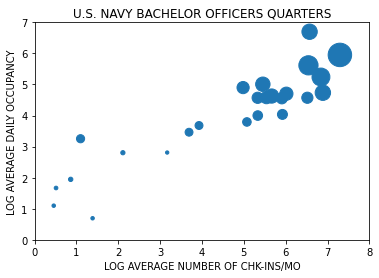

In [44]:
# p.39
logado = np.log(navy['ADO'])
logmac = np.log(navy['MAC'])

# p.42 Bubble plot
import matplotlib.pyplot as plt

plt.scatter(logmac, logado, s = navy['MMH']/15)

plt.xlim(0,8) ; plt.ylim(0,7)
plt.xlabel('LOG AVERAGE NUMBER OF CHK-INS/MO')
plt.ylabel('LOG AVERAGE DAILY OCCUPANCY')
plt.title('U.S. NAVY BACHELOR OFFICERS QUARTERS')
plt.show()

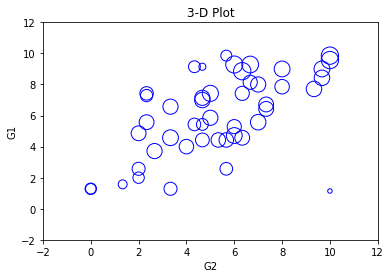

In [45]:
# p.45
G1 = applicant[['SC','LC','SMS','DRV','AMB','GSP','POT']].mean(axis=1)
G2 = applicant[['FL','EXP','SUIT']].mean(axis=1)
G3 = applicant[['LA','HON','KJ']].mean(axis=1)

plt.scatter(G2, G1, s = G3*30, facecolors='none', edgecolors='b')

plt.xlim(-2,12) ; plt.ylim(-2,12)
plt.xlabel('G2')
plt.ylabel('G1')
plt.title('3-D Plot')
plt.show()

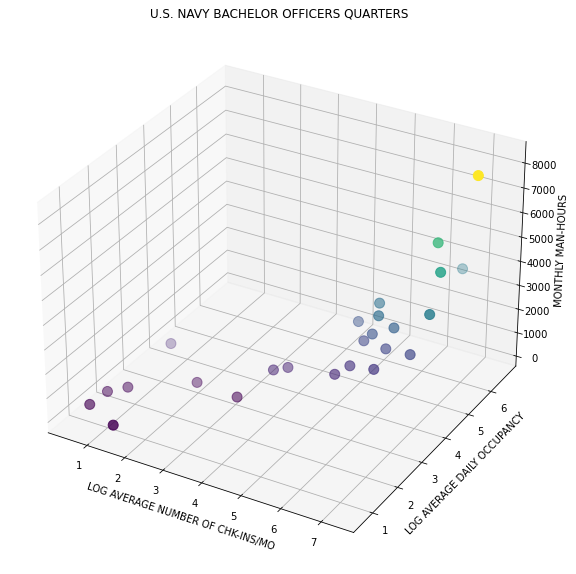

In [46]:
# p.46
plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

ax.scatter(logmac, logado, navy.MMH, c=navy.MMH, s=100)
ax.set_xlabel('LOG AVERAGE NUMBER OF CHK-INS/MO')
ax.set_ylabel('LOG AVERAGE DAILY OCCUPANCY')
ax.set_zlabel('MONTHLY MAN-HOURS')
ax.set_title('U.S. NAVY BACHELOR OFFICERS QUARTERS')
plt.show()

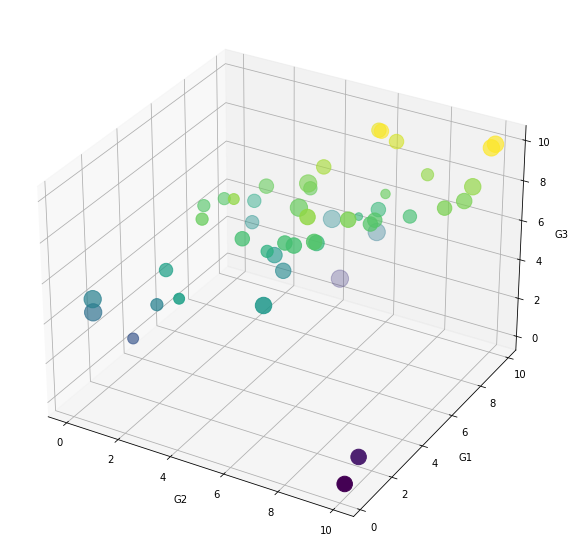

In [47]:
# p.47
plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

ax.scatter(G2, G1, G3, c=G3, s=applicant.AA*30)
ax.set_xlabel('G2')
ax.set_ylabel('G1')
ax.set_zlabel('G3')
plt.show()

In [48]:
# p.53
auto2 = auto.copy()
auto2.price = -auto2.price
auto2.turn = -auto2.turn
auto2.gratio = -auto2.gratio # change signs so that large values represent 'good' cars
auto2.dropna(inplace=True)
auto2 

,model,origin,price,mpg,rep78,rep77,hroom,rseat,trunk,weight,length,turn,displa,gratio
0,AMC CONCORD,A,-4099,22,3.0,2.0,2.5,27.5,11,2930,186,-40,121,-3.58
1,AMC PACER,A,-4749,17,3.0,1.0,3.0,25.5,11,3350,173,-40,258,-2.53
3,AUDI 5000,E,-9690,17,5.0,2.0,3.0,27.0,15,2830,189,-37,131,-3.20
4,AUDI FOX,E,-6295,23,3.0,3.0,2.5,28.0,11,2070,174,-36,97,-3.70
5,BMW 320I,E,-9735,25,4.0,4.0,2.5,26.0,12,2650,177,-34,121,-3.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW RABBIT,E,-4697,25,4.0,3.0,3.0,25.5,15,1930,155,-35,89,-3.78
70,VW RABBIT DIESEL,E,-5397,41,5.0,4.0,3.0,25.5,15,2040,155,-35,90,-3.78
71,VW SCIROCCO,E,-6850,25,4.0,3.0,2.0,23.5,16,1990,156,-36,97,-3.78
72,VW DASHER,E,-7140,23,4.0,3.0,2.5,37.5,12,2160,172,-36,97,-3.74


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
auto2.iloc[:,2:] = scaler.fit_transform(auto2.iloc[:,2:])
auto2.describe()

,price,mpg,rep78,rep77,hroom,rseat,trunk,weight,length,turn,displa,gratio
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.765210,0.316614,0.602273,0.549242,0.428571,0.365932,0.495791,0.418339,0.519481,0.573365,0.350105,0.521390
std,0.233245,0.203770,0.251829,0.241070,0.239046,0.183004,0.242907,0.258454,0.248485,0.228042,0.270256,0.271777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.758918,0.181034,0.500000,0.500000,0.285714,0.250000,0.333333,0.175325,0.313187,0.421053,0.117052,0.357353
50%,0.850218,0.275862,0.500000,0.500000,0.428571,0.363636,0.555556,0.464286,0.571429,0.526316,0.343931,0.564706
75%,0.926338,0.413793,0.750000,0.750000,0.571429,0.484848,0.652778,0.626623,0.697802,0.789474,0.480491,0.682353
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
import plotly.express as px

for i in range(15,25):  # 16번째 차량부터 25번째 차량까지만 그림
    df = pd.DataFrame(dict(
    r = auto2.iloc[i,2:],
    theta = auto2.columns[2:].tolist()))
    fig = px.line_polar(df, r='r',theta='theta',line_close=True,
                        range_r=[0,1],title=auto2.iloc[i,0])
    fig.show()

In [53]:
# Chernoff Faces
auto2 = auto.copy()
auto2.price = -auto2.price
auto2.turn = -auto2.turn
auto2.gratio = -auto2.gratio # change signs so that large values represent 'good' cars
auto2.dropna(inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
auto2.iloc[:,2:] = scaler.fit_transform(auto2.iloc[:,2:])

In [54]:
import matplotlib
from numpy.random import rand
from numpy import pi, arctan

def cface(ax,h,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12):
  
    # top of face
    e = matplotlib.patches.Ellipse( (0,(h+x2)/3), 2*x3, (h-x2), fc='white', edgecolor='black', linewidth=2)
    ax.add_artist(e)

    # bottom of face
    e = matplotlib.patches.Ellipse( (0,(-h+x1+x2)/3), 2*x4, (h+x1+x2), fc='white', edgecolor='black', linewidth=2)
    ax.add_artist(e)

    # cover overlaps
    e = matplotlib.patches.Ellipse( (0,(h+x2)/3), 2*x3, (h-x2), fc='white', edgecolor='black', ec='none')
    ax.add_artist(e)
    e = matplotlib.patches.Ellipse( (0,(-h+x1+x2)/3), 2*x4, (h+x1+x2), fc='white', edgecolor='black', ec='none')
    ax.add_artist(e)

    # draw nose
    ax.plot([0,0], [-x5/2, x5/2], 'k')

    # draw mouth
    p = matplotlib.patches.Arc( (0,-x6+.5/x7), 1/x7, 1/x7, theta1=270-180/pi*arctan(x7*x8), theta2=270+180/pi*arctan(x7*x8))
    ax.add_artist(p)

    # draw eyes
    p = matplotlib.patches.Ellipse( (-x10-x5/2,x9), x5, x12*x5, angle=-180/pi*x11, facecolor='white', edgecolor='black')
    ax.add_artist(p)

    p = matplotlib.patches.Ellipse( (x10+x5/2,x9), x5, x12*x5, angle=180/pi*x11, facecolor='white', edgecolor='black')
    ax.add_artist(p)

    # draw pupils
    p = matplotlib.patches.Ellipse( (-x10-x5/2-x6*x5/2, x9), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = matplotlib.patches.Ellipse( (x10+x5/2-x6*x5/2, x9), .05, .05, facecolor='black')
    ax.add_artist(p)

    # draw eyebrows
    ax.plot([-x10-x5/2-x5*x9/2,-x10-x5/2+x5*x9/2],[x9+x12*x5*(x7+x8),x9+x12*x5*(x7-x8)],'k')
    ax.plot([x10+x5/2+x5*x9/2,x10+x5/2-x5*x9/2],[x9+x12*x5*(x7+x8),x9+x12*x5*(x7-x8)],'k')

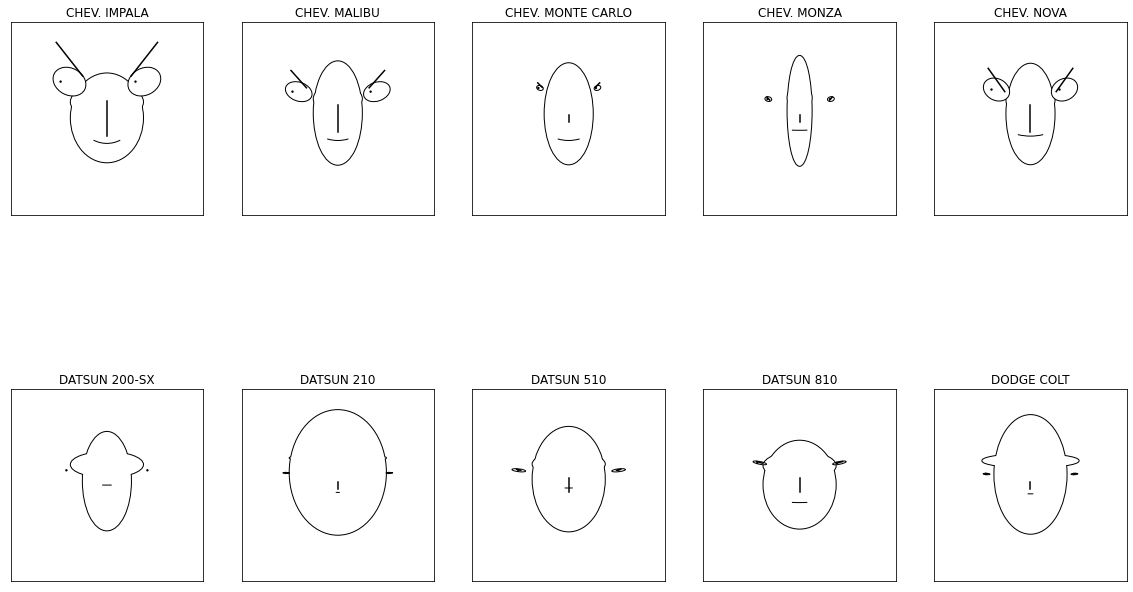

In [55]:
fig = plt.figure(figsize=(20,100))
for i in range(15,25):  # 16번째 차량부터 25번째 차량까지만 그림
    ax = fig.add_subplot(15,5,i+1,aspect='equal', title = auto2.iloc[i,0])
    cface(ax, 0.9, *auto2.iloc[i,2:].values.astype(np.float64))
    ax.axis([-2,2,-2,2])
    ax.set_xticks([])
    ax.set_yticks([])

In [57]:
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [58]:
auto2 = auto.copy()
auto2.dropna(inplace=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
auto2.iloc[:,2:] = scaler.fit_transform(auto2.iloc[:,2:])
auto3 = auto2[['origin','price','mpg','rep78','weight','gratio']]
auto3['origin']=auto3['origin'].replace({'A':1, 'E':2, 'J':3})

<ipython-input-58-a0f6a76e7d7d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
import plotly.express as px
fig = px.parallel_coordinates(auto3, color="origin", 
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()